PCA is often used for compression 

In the previous video, you saw an example of working with some MNIST digits data.  The MNIST dataset can be found here: http://yann.lecun.com/exdb/mnist/.

First, let's import the necessary libraries.  Notice there are also some imports from a file called `helper_functions`, which contains the functions used in the previous video.

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from helper_functions import show_images, show_images_by_digit, fit_random_forest_classifier2 
from helper_functions import fit_random_forest_classifier, do_pca, plot_components
import test_code as t

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

`1.` Use pandas to read in the dataset, which can be found in this workspace using the filepath **'./data/train.csv'**.  If you have missing values, fill them with 0.  Take a look at info about the data using `head`, `tail`, `describe`, `info`, etc.  You can learn more about the data values from the article here: https://homepages.inf.ed.ac.uk/rbf/HIPR2/value.htm.

In [19]:
data = pd.read_csv("data/train.csv") 

data.info()
data.describe()
# data.fillna(data.mean())
data.fillna(0, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6304 entries, 0 to 6303
Columns: 785 entries, label to pixel783
dtypes: float64(114), int64(671)
memory usage: 37.8 MB


In [20]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
data.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
6299,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6300,8,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6301,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6302,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6303,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


`2.` Create a vector called y that holds the **label** column of the dataset.  Store all other columns holding the pixel data of your images in X.

In [23]:
y = data['label']
print(y)

X = data.drop(['label'], axis=1)

print(X.shape)



0       1
1       0
2       1
3       4
4       0
       ..
6299    9
6300    8
6301    7
6302    0
6303    2
Name: label, Length: 6304, dtype: int64
(6304, 784)


In [24]:
#Check Your Solution 
t.question_two_check(y, X)

That looks right!


`3.` Now use the `show_images_by_digit` function from the `helper_functions` module to take a look some of the `1`'s, `2`'s, `3`'s, or any other value you are interested in looking at.  Do they all look like what you would expect?

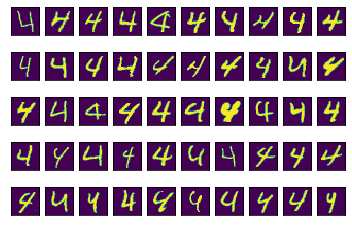

In [25]:
show_images_by_digit(4) # Try looking at a few other digits

`4.` Now that you have had a chance to look through some of the data, you can try some different algorithms to see what works well to use the X matrix to predict the response well.  If you would like to use the function I used in the video regarding random forests, you can run the code below, but you might also try any of the supervised techniques you learned in the previous course to see what works best.

If you decide to put together your own classifier, remember the 4 steps to this process:

**I.** Instantiate your model. (with all the hyperparameter values you care about)

**II.** Fit your model. (to the training data)

**III.** Predict using your fitted model.  (on the test data)

**IV.** Score your model. (comparing the predictions to the actual values on the test data)

You can also try a grid search to see if you can improve on your initial predictions.

In [26]:
# Remove the tag to fit the RF model from the video, you can also try fitting your own!
fit_random_forest_classifier(X, y)

[[202   0   0   0   0   0   6   0   1   0]
 [  0 234   2   1   0   1   1   2   2   0]
 [  1   5 213   0   2   0   1   6   0   0]
 [  1   0   5 177   0   5   0   1   1   1]
 [  1   0   1   0 169   0   2   0   0   5]
 [  2   2   0   4   0 172   4   1   1   0]
 [  2   0   2   0   2   2 203   0   0   0]
 [  0   0   6   0   3   0   0 208   3   5]
 [  0   1   3   7   0   3   1   0 185   2]
 [  2   0   0   3  12   1   0   2   4 184]]
0.9356078808265257


0.9356078808265257

In [28]:
#First let's create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#We could grid search and tune, but let's just fit a simple model to see how it does
#instantiate
clf = RandomForestClassifier(n_estimators=100, max_depth=None)

#fit
clf.fit(X_train, y_train)

#predict
y_preds = clf.predict(X_test)

#score
print(confusion_matrix(y_test, y_preds))
acc = accuracy_score(y_test, y_preds)
print(acc)


[[201   0   1   0   0   1   5   0   1   0]
 [  0 234   3   0   1   0   1   2   2   0]
 [  1   5 213   0   3   0   1   5   0   0]
 [  2   0   4 176   0   4   0   1   2   2]
 [  0   0   1   0 171   0   1   0   0   5]
 [  3   1   0   3   0 174   3   1   1   0]
 [  3   0   0   0   1   2 205   0   0   0]
 [  0   1   7   1   4   0   0 205   2   5]
 [  0   2   2   4   0   4   1   0 187   2]
 [  2   1   0   2  11   0   0   1   5 186]]
0.9380105718404613


`5.` Now for the purpose of this lesson, to look at PCA.  In the video, I created a model just using two features.  Replicate the process below. You can use the same `do_pca` function that was created in the previous video.  Store your variables in **pca** and **X_pca**.

In [48]:
# do_pca
n_components = 30

X = StandardScaler().fit_transform(data)
pca = PCA(n_components)
X_pca = pca.fit_transform(X)

print(X_pca.shape)

# X_pca is the compressed X


(6304, 30)


`6.` The **X_pca** has reduced the original number of more than 700 features down to only 2 features that capture the majority of the variability in the pixel values.  Use the space below to fit a model using these two features to predict the written value.  You can use the random forest model by running `fit_random_forest_classifier` the same way as in the video. How well does it perform?

In [49]:
# fit_random_forest_classifier?

fit_random_forest_classifier(X_pca, y)

[[194   0   3   0   0   1   8   1   2   0]
 [  0 233   2   0   0   0   2   1   5   0]
 [  2   3 211   3   2   0   2   4   1   0]
 [  0   0   7 170   0   6   0   2   5   1]
 [  0   0   5   0 158   0   2   2   0  11]
 [  0   0   3   9   1 168   2   0   1   2]
 [  5   0   1   0   3   2 200   0   0   0]
 [  1   0   6   3   2   0   0 198   3  12]
 [  2   2   1  10   2   6   1   0 177   1]
 [  2   0   1   2  13   1   0  13   1 175]]
0.9053339740509371


0.9053339740509371

`7.` Now you can look at the separation of the values using the `plot_components` function.  If you plot all of the points (more than 40,000), you will likely not be able to see much of what is happening.  I recommend plotting just a subset of the data.  Which value(s) have some separation that are being predicted better than others based on these two components?

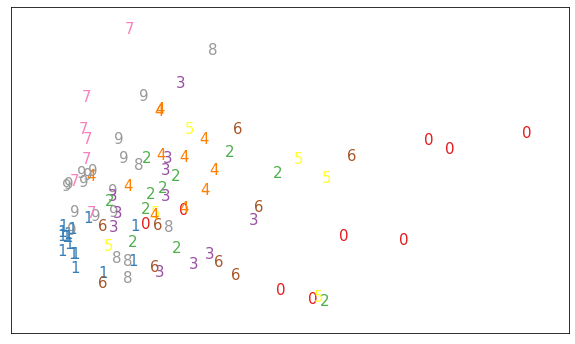

In [50]:
# Try plotting some of the numbers below - you can change the number
# of digits that are plotted, but it is probably best not to plot the 
# entire dataset.  Your visual will not be readable.

plot_components(X_pca[:100], y[:100])

`8.` See if you can find a reduced number of features that provides better separation to make predictions.  Say you want to get separation that allows for accuracy of more than 90%, how many principal components are needed to obtain this level of accuracy?  Were you able to substantially reduce the number of features needed in your final model?

`9.` It is possible that extra features in the dataset even lead to overfitting or the [curse of dimensionality](https://stats.stackexchange.com/questions/65379/machine-learning-curse-of-dimensionality-explained).  Do you have evidence of this happening for this dataset?  Can you support your evidence with a visual or table?  To avoid printing out all of the metric results, I created another function called `fit_random_forest_classifier2`.  I ran through a significant number of components to create the visual for the solution, but I strongly recommend you look in the range below 100 principal components!

In [51]:
# do_pca
n_components = 80

X = StandardScaler().fit_transform(data)
pca = PCA(n_components)
X_pca = pca.fit_transform(X)

print(X_pca.shape)

# X_pca is the compressed X


(6304, 80)


In [53]:
fit_random_forest_classifier2(X_pca, y)

0.9000480538202787